# Catch me if you can

__Intruder Detection through Webpage Session Tracking__

https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
np.warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('site10.csv') 
data=data.drop(['Unnamed: 0'],1)

In [3]:
data.columns

Index(['session_id', 'site1', 'time1', 'site2', 'time2', 'site3', 'time3',
       'site4', 'time4', 'site5', 'time5', 'site6', 'time6', 'site7', 'time7',
       'site8', 'time8', 'site9', 'time9', 'site10', 'time10', 'target'],
      dtype='object')

In [4]:
data.sample(5)

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
115611,115612,people.directory.live.com,2014-03-31 16:40:20,dub128.mail.live.com,2014-03-31 16:40:20,h.live.com,2014-03-31 16:40:23,h.bing.com,2014-03-31 16:40:23,g.live.com,...,2014-03-31 16:40:27,dub128.mail.live.com,2014-03-31 16:40:27,cid-ed6c3e6a5c6608a4.users.storage.live.com,2014-03-31 16:40:27,storage.live.com,2014-03-31 16:40:28,login.live.com,2014-03-31 16:40:28,1
238042,238043,translate.google.com,2014-04-02 14:45:21,mail.google.com,2014-04-02 14:46:08,0.talkgadget.google.com,2014-04-02 14:46:16,translate.google.com,2014-04-02 14:46:54,inputtools.google.com,...,2014-04-02 14:46:55,translate.google.com,2014-04-02 14:46:56,translate.google.com,2014-04-02 14:46:57,translate.google.com,2014-04-02 14:47:01,translate.google.com,2014-04-02 14:47:02,0
111692,111693,www.googleapis.com,2014-04-25 11:27:27,safebrowsing.clients.google.com,2014-04-25 11:27:40,safebrowsing-cache.google.com,2014-04-25 11:27:40,safebrowsing-cache.google.com,2014-04-25 11:27:41,ajax.googleapis.com,...,2014-04-25 11:31:08,ent.univ-bpclermont.fr,2014-04-25 11:31:11,www.univ-bpclermont.fr,2014-04-25 11:31:12,claroline.univ-bpclermont.fr,2014-04-25 11:31:12,ent.univ-bpclermont.fr,2014-04-25 11:31:12,0
35731,35732,garpitmzn.blogspot.fr,2013-12-18 10:36:33,chart.googleapis.com,2013-12-18 10:36:33,www.blogger.com,2013-12-18 10:36:34,www.google.com,2013-12-18 10:36:34,www.blogger.com,...,2013-12-18 10:37:08,www.squid-cache.org,2013-12-18 10:37:17,www.google.fr,2013-12-18 10:37:30,www.blogger.com,2013-12-18 10:39:25,accounts.google.com,2013-12-18 10:39:27,0
52932,52933,apis.google.com,2014-02-27 11:15:48,www.blogger.com,2014-02-27 11:15:48,1.bp.blogspot.com,2014-02-27 11:15:48,2.bp.blogspot.com,2014-02-27 11:15:48,3.bp.blogspot.com,...,2014-02-27 11:15:48,4.bp.blogspot.com,2014-02-27 11:15:48,www.youtube.com,2014-02-27 11:15:50,i1.ytimg.com,2014-02-27 11:15:54,i1.ytimg.com,2014-02-27 11:15:55,0


In [5]:
data.shape

(253561, 22)

In [6]:
data.target.value_counts()

0    251264
1      2297
Name: target, dtype: int64

# Exploratory Data Analysis (EDA)

In [5]:
data['time1']=data['time1'].astype('datetime64[ns]')

In [6]:
session_start_hour = data['time1'].apply(lambda x: x.hour).values
session_start_day = data['time1'].apply(lambda x: x.dayofweek).values
session_start_month = data['time1'].apply(lambda x: x.month).values

Text(0.5, 0, 'Session start month')

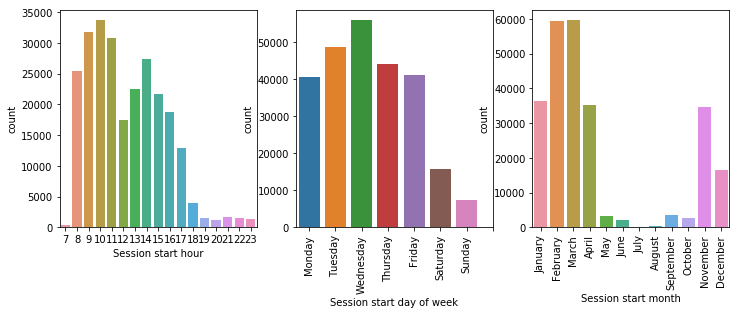

In [9]:
plt.subplots(1,3, figsize = (12, 4)) 

plt.subplot(1, 3, 1)
sns.countplot(session_start_hour) 
plt.xlabel('Session start hour')
          
plt.subplot(1, 3, 2)
sns.countplot(session_start_day)
plt.xticks(np.arange(8),calendar.day_name[0:8],rotation=90)
plt.xlabel('Session start day of week')

plt.subplot(1, 3, 3)
sns.countplot(session_start_month)
plt.xticks(np.arange(12),calendar.month_name[1:13],rotation=90)
plt.xlabel('Session start month')


In [7]:
robot_session_start_hour=data['time1'][data['target']==1].apply(lambda x: x.hour).values
robot_session_start_day=data['time1'][data['target']==1].apply(lambda x: x.dayofweek).values

In [8]:
robot_session_start_month=data['time1'][data['target']==1].apply(lambda x: x.month)
robot_session_start_month_vc=robot_session_start_month.value_counts()

In [9]:
user_session_start_hour=data['time1'][data['target']==0].apply(lambda x: x.hour).values
user_session_start_day=data['time1'][data['target']==0].apply(lambda x: x.dayofweek).values
user_session_start_month=data['time1'][data['target']==0].apply(lambda x: x.month).values

In [13]:
robot_months = pd.DataFrame(robot_session_start_month_vc.\
                         reindex(range(robot_session_start_month.min(),robot_session_start_month.max()+1), fill_value=0))\
                         .reset_index()

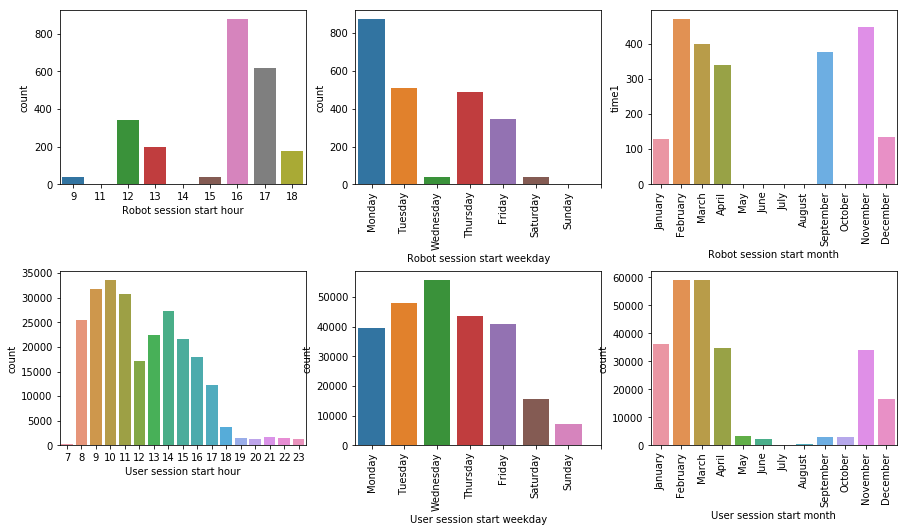

In [14]:
plt.subplots(2, 3, figsize = (15, 8)) 

plt.subplot(2, 3, 1)
sns.countplot(robot_session_start_hour)
plt.xlabel("Robot session start hour")

plt.subplot(2, 3, 2)
sns.countplot(robot_session_start_day)
plt.xticks(np.arange(8),calendar.day_name[0:8],rotation=90)
plt.xlabel("Robot session start weekday")

plt.subplot(2, 3, 3)
sns.barplot(x='index', y='time1', data=robot_months)
plt.xticks(np.arange(12),calendar.month_name[1:13],rotation=90)
plt.xlabel("Robot session start month")
          
plt.subplot(2, 3, 4)
sns.countplot(user_session_start_hour)
plt.xlabel("User session start hour")

plt.subplot(2, 3, 5)
sns.countplot(user_session_start_day)
plt.xticks(np.arange(8),calendar.day_name[0:8],rotation=90)
plt.xlabel("User session start weekday")

plt.subplot(2, 3, 6)
sns.countplot(user_session_start_month)
plt.xticks(np.arange(12),calendar.month_name[1:13],rotation=90)
plt.xlabel("User session start month")

plt.subplots_adjust(hspace=0.5)

In [10]:
times = ['time%s' % i for i in range(1, 11)]
sites = ['site%s' % i for i in range(1, 11)]

In [11]:
data_time  =  data[times] 
data_time.head(7)

,time1,time2,time3,time4,time5,time6,time7,time8,time9,time10
0,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-02-22 11:19:50,2014-02-22 11:19:50,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:52,2014-02-22 11:19:52,2014-02-22 11:20:15,2014-02-22 11:20:16
2,2013-12-16 16:40:17,2013-12-16 16:40:18,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:20,2013-12-16 16:40:21,2013-12-16 16:40:22,2013-12-16 16:40:24
3,2014-03-28 10:52:12,2014-03-28 10:52:42,2014-03-28 10:53:12,2014-03-28 10:53:42,2014-03-28 10:54:12,2014-03-28 10:54:42,2014-03-28 10:55:12,2014-03-28 10:55:42,2014-03-28 10:56:12,2014-03-28 10:56:42
4,2014-02-28 10:53:05,2014-02-28 10:55:22,2014-02-28 10:55:22,2014-02-28 10:55:23,2014-02-28 10:55:23,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:57:06,2014-02-28 10:57:11
5,2014-03-18 15:18:31,2014-03-18 15:18:39,2014-03-18 15:23:02,2014-03-18 15:23:43,2014-03-18 15:29:57,NaN,NaN,NaN,NaN,NaN
6,2014-02-13 16:45:35,2014-02-13 16:45:35,2014-02-13 16:45:35,2014-02-13 16:45:35,2014-02-13 16:46:05,2014-02-13 16:47:14,2014-02-13 16:47:14,2014-02-13 16:47:15,2014-02-13 16:47:16,2014-02-13 16:47:17


In [12]:
data_time=data_time.astype('datetime64[ns]')

In [13]:
data_time_diff=pd.DataFrame()

In [14]:
for i in range(1,data_time.shape[1]):
   data_time_diff['interval'+str(i)]=(data_time['time'+str(i+1)]-data_time['time'+str(i)]).apply(lambda x: x.total_seconds())

In [66]:
data_time_diff['target']=data['target']

In [83]:
data_time_diff.sample(15)

,interval1,interval2,interval3,interval4,interval5,interval6,interval7,interval8,interval9,target
34658,11.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,0.0,0
161040,0.0,0.0,1.0,0.0,3.0,6.0,1.0,1.0,1.0,0
87283,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
14321,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0
70719,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,10.0,0
110665,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,73.0,0
212454,0.0,1.0,0.0,4.0,0.0,5.0,0.0,9.0,11.0,0
183862,2.0,2.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,0
80083,43.0,33.0,43.0,0.0,0.0,0.0,78.0,32.0,142.0,0
157178,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1


In [84]:
data_time_diff=data_time_diff.drop('target',1)

In [15]:
data_time_diff['interval_std']=round(data_time_diff.std(axis=1),2)

In [16]:
data_time_diff['interval_std']=data_time_diff['interval_std'].fillna(0)

In [17]:
session_length=[]
for i in range(data_time.shape[0]):
    time_start=data_time.iloc[i].min()
    time_end=data_time.iloc[i].max()
    time=(time_end-time_start).total_seconds()
    session_length.append(time)

In [18]:
data_time_diff['session_length']=session_length

In [19]:
data_time_diff['target']=data['target']

In [31]:
data_time_diff.sample(15)

,interval1,interval2,interval3,interval4,interval5,interval6,interval7,interval8,interval9,interval_std,session_length,target
115913,105.0,0.0,2.0,0.0,7.0,61.0,10.0,0.0,1.0,37.18,186.0,0
94507,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.50,3.0,1
43289,0.0,0.0,15.0,1.0,4.0,1.0,0.0,1.0,10.0,5.36,32.0,0
225912,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.83,7.0,0
102201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0
183264,0.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.71,6.0,0
52429,9.0,10.0,5.0,6.0,1.0,3.0,1.0,0.0,5.0,3.54,40.0,0
164826,1.0,1.0,32.0,5.0,1.0,1.0,0.0,1.0,0.0,10.36,42.0,0
174173,0.0,0.0,0.0,52.0,0.0,2.0,1.0,1.0,1.0,17.14,57.0,0
95884,2.0,1.0,4.0,1.0,2.0,1.0,0.0,2.0,2.0,1.12,15.0,0


In [21]:
data_time_diff['interval_std']=data_time_diff['interval_std'].fillna(0)

In [117]:
robot_mean_std=data_time_diff['interval_std'][data_time_diff['target']==1].mean()
print ('Robot mean std of intervals: '+str(robot_mean_std))

Robot mean std of intervals: 11.147078798432673


In [118]:
user_mean_std=data_time_diff['interval_std'][data_time_diff['target']==0].mean()
print ('User mean std of intervals: '+str(user_mean_std))

User mean std of intervals: 31.703506152904886


In [32]:
robot_mean_session=data_time_diff['session_length'][data_time_diff['target']==1].mean()
print ('Robot mean session length: '+str(robot_mean_session))

Robot mean session length: 52.29647366129734


In [33]:
user_mean_session=data_time_diff['session_length'][data_time_diff['target']==0].mean()
print ('User mean session length: '+str(user_mean_session))

User mean session length: 139.28237232552215


Text(0.5, 1.0, 'Session length')

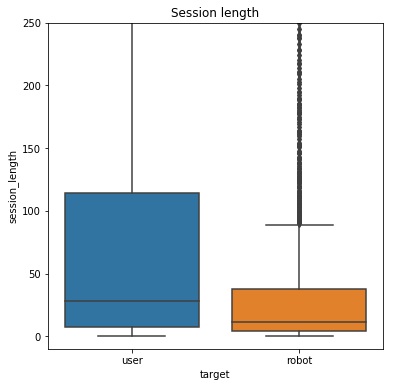

In [34]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x = 'target', y = 'session_length', data = data_time_diff)
ax.set(ylim=(-10, 250))
ax.set_xticklabels(['user','robot'])
plt.title("Session length")

Text(0.5, 1.0, 'Interval standard deviation')

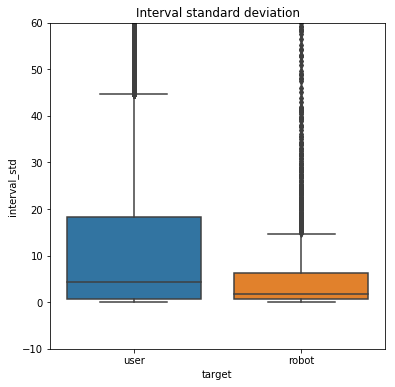

In [210]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x = 'target', y = 'interval_std', data = data_time_diff)
ax.set(ylim=(-10, 60))
ax.set_xticklabels(['user','robot'])
plt.title("Interval standard deviation")

In [36]:
data_sites  =  data[sites] 
data_sites.sample(7)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
246542,pianku.xmp.kankan.com,img.xmp.kankan.kanimg.com,img.xmp.kankan.kanimg.com,img2.kankan.kanimg.com,pianku.xmp.kankan.com,img.xmp.kankan.kanimg.com,img2.kankan.kanimg.com,img.xmp.kankan.kanimg.com,images.client.xunlei.com,pianku.xmp.kankan.com
218034,www.goal.com,www.goal.com,www.goal.com,connect.facebook.net,comments.us1.gigya.com,cdns.gigya.com,www.facebook.com,s-static.ak.facebook.com,apis.google.com,clients1.google.fr
66646,login.yahoo.com,login.yahoo.com,login.yahoo.com,login.yahoo.com,login.yahoo.com,fr-mg42.mail.yahoo.com,fr-mg42.mail.yahoo.com,ucs.query.yahoo.com,ucs.query.yahoo.com,fr-mg42.mail.yahoo.com
85862,gtssl-ocsp.geotrust.com,clients1.google.com,gtglobal-ocsp.geotrust.com,ba.commentcamarche.net,r.ccm2.net,www.google.fr,static.commentcamarche.net,clients1.google.com,www.commentcamarche.net,static.ccm2.net
74466,static.ak.facebook.com,www.facebook.com,fr.msn.com,login.live.com,s-static.ak.facebook.com,img2.video.s-msn.com,byfiles.storage.msn.com,img1.video.s-msn.com,hub.video.msn.com,img2.video.s-msn.com
241168,stackoverflow.com,cdn-careers.sstatic.net,stackoverflow.com,ocsp.digicert.com,cdn-careers.sstatic.net,careers.stackoverflow.com,ocsp.verisign.com,adzerk-www.s3.amazonaws.com,stackauth.com,www.gravatar.com
235281,thumb10.shutterstock.com,thumb7.shutterstock.com,stocklogos.com,www.facebook.com,www.brandsoftheworld.com,www.facebook.com,platform.twitter.com,maps.googleapis.com,www.shutterstock.com,www.brandsoftheworld.com


In [108]:
data_sites[data_sites.target==1].sample(7)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target
155882,static.ak.facebook.com,asset.email-match.com,www.be2.fr,s-static.ak.facebook.com,youwatch.org,app.be2.fr,img.be2.com,www.be2.fr,www.facebook.com,www.audienceinsights.net,1
241788,s.youtube.com,r4---sn-gxo5uxg-jqbe.googlevideo.com,r4---sn-gxo5uxg-jqbe.googlevideo.com,s.youtube.com,www.google.com,s.ytimg.com,i1.ytimg.com,www.youtube.com,clients1.google.com,i1.ytimg.com,1
201194,connect.facebook.net,s-static.ak.facebook.com,static.ak.facebook.com,www.audienceinsights.net,ada.brucelead.com,a.ad-sys.com,www.facebook.com,deliv.leboncoin.fr,www.audienceinsights.net,retargeting.veoxa.com,1
182685,static.cbox.ws,www.youtube.com,nayariverasource.com,static.cbox.ws,s.ytimg.com,i1.ytimg.com,nayariverasource.com,i1.ytimg.com,www.youtube.com,www.youtube.com,1
45849,193.164.196.30,193.164.197.60,193.164.197.30,deliv.leboncoin.fr,193.164.197.40,www.leboncoin.fr,static.leboncoin.fr,193.164.196.60,deliv.leboncoin.fr,193.164.197.50,1
31968,s.youtube.com,i1.ytimg.com,i1.ytimg.com,i1.ytimg.com,i1.ytimg.com,www.dailymotion.com,i1.ytimg.com,www.youtube.com,www.dailymotion.com,s.youtube.com,1
244638,www.youtube.com,r4---sn-gxo5uxg-jqbe.googlevideo.com,s.youtube.com,i1.ytimg.com,r4---sn-gxo5uxg-jqbe.googlevideo.com,lh4.ggpht.com,www.youtube.com,r4---sn-gxo5uxg-jqbe.googlevideo.com,www.youtube.com,s.youtube.com,1


__Counting the number of unique sites visited during one session:__

In [37]:
data_sites['unique_sites']=data_sites.nunique(axis=1,dropna=True)a

In [44]:
data_sites['target']=data['target']

In [45]:
robot_unique_sites=data_sites['unique_sites'][data_sites['target']==1].mean()
print ('Robot mean unique number of websites for one session: '+str(robot_unique_sites))

Robot mean unique number of websites for one session: 6.109272964736613


In [46]:
user_unique_sites=data_sites['unique_sites'][data_sites['target']==0].mean()
print ('User mean unique number of websites for one session: '+str(user_unique_sites))

User mean unique number of websites for one session: 5.63408606087621


Text(0.5, 0, 'User unique sites per session')

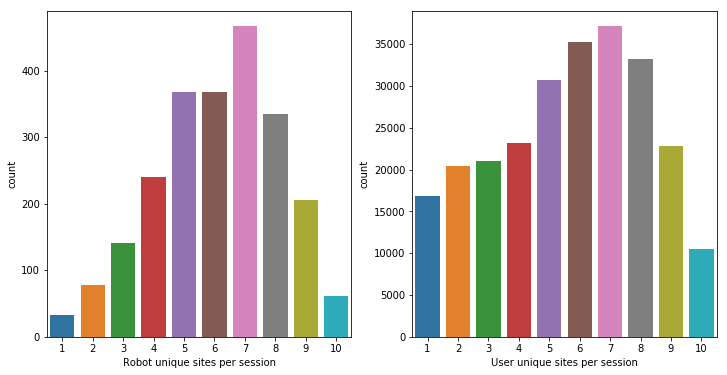

In [47]:
plt.subplots(1,2, figsize = (12, 6)) 

plt.subplot(1, 2, 1)
sns.countplot(data_sites['unique_sites'][data_sites['target']==1]) 
plt.xlabel('Robot unique sites per session')
          
plt.subplot(1, 2, 2)
sns.countplot(data_sites['unique_sites'][data_sites['target']==0]) 
plt.xlabel('User unique sites per session')


__Counting the number of digits and dashes in one session:__

In [38]:
data_sites=data_sites.fillna('none')

In [39]:
data_sites['names']=data_sites.drop(['unique_sites'],1).apply(lambda x: ''.join(x), axis=1)

In [40]:
data_sites['dashes']=data_sites['names'].apply(lambda x : x.count('-'))

In [41]:
data_sites['digits']=data_sites['names'].apply(lambda x : x.count('\d'))

In [42]:
data_sites['dashes_digits']=data_sites['digits']+data_sites['dashes']

Text(0.5, 1.0, 'Number of digits and dashes in websites names')

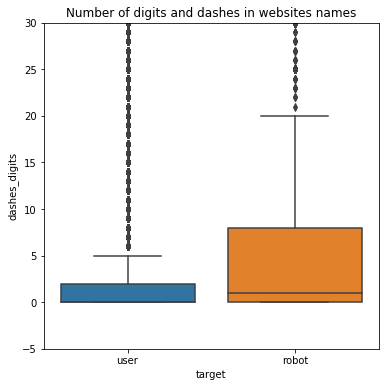

In [57]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x = 'target', y = 'dashes_digits', data = data_sites)
ax.set(ylim=(-5, 30))
ax.set_xticklabels(['user','robot'])
plt.title("Number of digits and dashes in websites' names")

# Feature engineering based on EDA

In [58]:
data_time_diff.columns

Index(['interval1', 'interval2', 'interval3', 'interval4', 'interval5',
       'interval6', 'interval7', 'interval8', 'interval9', 'interval_std',
       'session_lenght'],
      dtype='object')

In [63]:
data_ml=data_time_diff[['interval_std','session_length']]

In [64]:
start_hour=data_time.time1.apply(lambda x:x.hour).tolist()

In [65]:
data_ml['daytime']=start_hour

In [66]:
data_ml['daytime']=np.where((data_ml['daytime']>=7)&(data_ml['daytime']<12),'morning',
                             (np.where((data_ml['daytime']>=12)&(data_ml['daytime']<16),'afternoon',
                             (np.where((data_ml['daytime']>=16)&(data_ml['daytime']<=20),'evening','night')))))

In [67]:
start_weekday=data_time.time1.apply(lambda x:x.dayofweek).tolist()

In [68]:
data_ml['weekday']=start_weekday

In [69]:
rename_dict=dict(zip(range(8),calendar.day_name[0:8]))

In [70]:
data_ml['weekday']=data_ml['weekday'].replace(rename_dict)

In [71]:
start_month=data_time.time1.apply(lambda x:x.month).tolist()

In [72]:
data_ml['month']=start_month

In [73]:
rename_dict_month=dict(zip(range(1,13),calendar.month_name[1:13]))

In [74]:
data_ml['month']=data_ml['month'].replace(rename_dict_month)

In [75]:
data_ml.head()

,interval_std,session_length,daytime,weekday,month
0,0.00,0.0,morning,Thursday,February
1,7.56,26.0,morning,Saturday,February
2,0.67,7.0,evening,Monday,December
3,0.00,270.0,morning,Friday,March
4,47.24,246.0,morning,Friday,February


__One Hot Encoding of categorical features:__

In [76]:
data_ml=pd.get_dummies(data_ml)

In [77]:
data_ml.head()

,interval_std,session_length,daytime_afternoon,daytime_evening,daytime_morning,daytime_night,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0.00,0.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,7.56,26.0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0.67,7.0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.00,270.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,47.24,246.0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [78]:
data_ml['unique_sites']=data_sites['unique_sites']

In [79]:
data_ml['dashes_digits']=data_sites['dashes_digits']

In [80]:
data_ml['target']=data['target']

In [82]:
data_ml.columns

Index(['interval_std', 'session_length', 'daytime_afternoon',
       'daytime_evening', 'daytime_morning', 'daytime_night', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'unique_sites',
       'dashes_digits', 'target'],
      dtype='object')

In [83]:
data_ml=data_ml[['target','interval_std', 'session_length','unique_sites', 'dashes_digits','daytime_afternoon',
       'daytime_evening', 'daytime_morning', 'daytime_night', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September']]

In [109]:
data_ml.shape

(253561, 28)

In [84]:
data_ml.sample(7)

,target,interval_std,session_length,unique_sites,dashes_digits,daytime_afternoon,daytime_evening,daytime_morning,daytime_night,weekday_Friday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
196006,0,1.92,16.0,5,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20456,1,0.44,2.0,6,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118666,0,3.36,22.0,5,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
191546,0,4.39,23.0,5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
74394,0,86.17,274.0,7,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
246173,0,0.00,3.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153387,0,15.33,94.0,7,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [100]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [101]:
X=data_ml.drop('target',1)
y=data_ml.target

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [103]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_pred,y_test)}')

Accuracy score: 0.9907320984895293


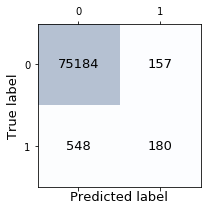

In [104]:
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
fig,ax=plt.subplots(figsize=(3,3))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center',fontsize=13)
plt.xlabel('Predicted label',fontsize=13)
plt.ylabel('True label',fontsize=13)
plt.show()